## Load libraries

In [1]:
# Libraries to work cross-platform
import os

# Libraries to work with dataset
import numpy as np

# Libraries to visualize data
import seaborn as sns
import matplotlib.cm as cm
from cluster_visualization_helper import (
    compute_cluster_visualization,
    visualize_cluster)  # user-defined functions

## Configurate and declare global variables

In [2]:
os_name = os.name

if os_name == 'nt':
    """Windows platform"""
    BASE_DIR = "E:/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"

elif os_name == 'posix':
    """Linux platform"""
    BASE_DIR = "/media/pinkalinux/WORK/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"

INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"
RESULT_DIR = BASE_DIR + "RESULTS/"

SEED = 6886
%matplotlib inline

## Import data

In [6]:
title_embeddings = np.load(OUTPUT_DIR + "title_embeddings.npy")
title_embeddings.shape

(18992, 300)

## Reduce dimensions to visualize datapoints in 2D

In [4]:
# Compute t-SNE components
_, _, tsne_datapoint = compute_cluster_visualization(
    X=title_embeddings, pca=False, tsne=True, compute_umap=False, seed=SEED
)

Start t-SNE 2021-05-17 14:08:13.666015
End t-SNE 2021-05-17 14:11:32.705730
t-SNE duration 0:03:19.039715


In [5]:
# Compute PCA components
pca_datapoint, _, _ = compute_cluster_visualization(
    X=title_embeddings, pca=True, tsne=False, compute_umap=False, seed=SEED
)

Start PCA 2021-05-17 14:11:32.723732
End PCA 2021-05-17 14:11:33.064730
PCA duration 0:00:00.340998


In [6]:
# Compute UMAP components
_, umap_datapoint, _ = compute_cluster_visualization(
    X=title_embeddings, pca=False, tsne=False, compute_umap=True, seed=SEED
)

Start UMAP 2021-05-17 14:11:33.071734
UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=7, random_state=6886,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 14:11:33 2021 Finding Nearest Neighbors
Mon May 17 14:11:33 2021 Building RP forest with 12 trees
Mon May 17 14:11:34 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	Stopping threshold met -- exiting after 5 iterations
Mon May 17 14:11:46 2021 Finished Nearest Neighbor Search
Mon May 17 14:11:48 2021 Construct embedding


c:\users\pinkavivo\appdata\local\programs\python\python38\lib\site-packages\umap\spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
c:\users\pinkavivo\appdata\local\programs\python\python38\lib\site-packages\umap\spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 14:12:05 2021 Finished embedding
End UMAP 2021-05-17 14:12:05.800729
UMAP duration 0:00:32.728995


In [7]:
pca_datapoint.shape

(18992, 2)

In [8]:
tsne_datapoint.shape

(18992, 2)

In [9]:
umap_datapoint.shape

(18992, 2)

In [10]:
# Save PCA, UMAP, and t-SNE data points to numpy file
np.save(OUTPUT_DIR + "visualization/" + "title_pca_datapoints", pca_datapoint)
np.save(OUTPUT_DIR + "visualization/" + "title_tsne_datapoints", tsne_datapoint)
np.save(OUTPUT_DIR + "visualization/" + "title_umap_datapoints", umap_datapoint)

In [4]:
# Load PCA, UMAP, and t-SNE data points from numpy file
pca_datapoint = np.load(OUTPUT_DIR + "visualization/" + "title_pca_datapoints.npy")
tsne_datapoint = np.load(OUTPUT_DIR + "visualization/" + "title_tsne_datapoints.npy")
umap_datapoint = np.load(OUTPUT_DIR + "visualization/" + "title_umap_datapoints.npy")

Start PCA 2021-05-18 14:13:54.344413
End PCA 2021-05-18 14:13:54.351405
PCA duration 0:00:00.006992

Start t-SNE 2021-05-18 14:13:54.351405
End t-SNE 2021-05-18 14:13:54.360411
t-SNE duration 0:00:00.009006

Start UMAP 2021-05-18 14:13:54.360411
End UMAP 2021-05-18 14:13:54.366445
UMAP duration 0:00:00.006034



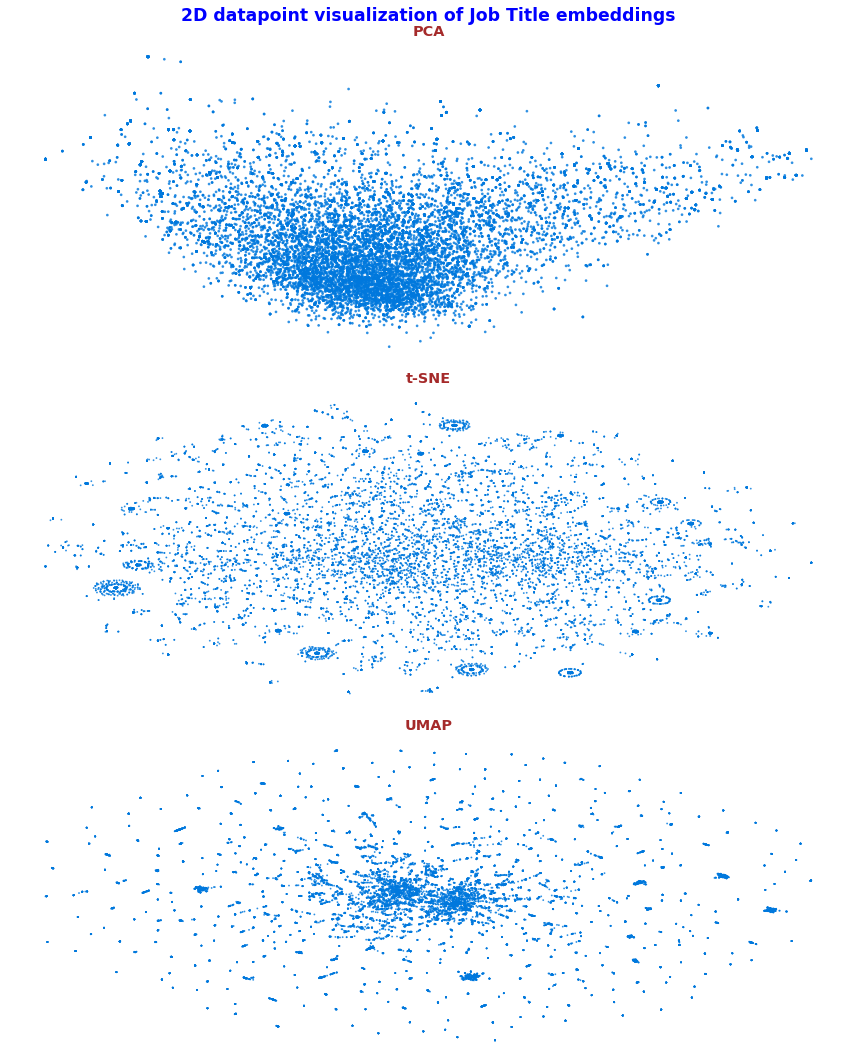

In [7]:
plot_title = "2D datapoint visualization of Job Title embeddings"
plot_filename = RESULT_DIR + "title_embeddings_visualization.png"
palette = sns.color_palette("hls", as_cmap=True)
colors = cm.nipy_spectral(np.array([0.25]*title_embeddings.shape[0]))

# Visualize clusters with PCA and t-SNE
visualize_cluster(
    plot_title,
    (12, 15),
    colors,
    palette,
    3,
    pca_datapoint,
    tsne_datapoint,
    umap_datapoint,
    pca=True,
    tsne=True,
    compute_umap=True,
    save_plots=True,
    plot_file=plot_filename
)